In [4]:
from getpass import getpass
model = "NousResearch/Meta-Llama-3-8B-Instruct"
base_url="http://localhost:8000/v1"

from openai import OpenAI
import re
import os

openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    api_key=openai_api_key,
)

def chat_completion_request_openai(prompt):
    messages = [
        {"role": "user", "content": prompt}
    ]

    chat_response = client.chat.completions.create(
    model='gpt-4o',
    messages=messages,
    temperature=1.0,
    max_tokens=1000
    )
    if chat_response.choices:
        completion_text = chat_response.choices[0].message.content
    else:
        completion_text = None
    return completion_text

def openai_evaluator(question, answer):
    # prompt = (
    # "Below I will provide a prompt for a multiagent system (meta-gpt), and its answer. provide me an analysis of the failure modes and inefficiencies as I will say below. \n"
    # "In the traces, look for the prompt I provided in a linux command to the system, and analyze the system behaviour."
    # "There are several failure modes in multiagent systems I identified. I will provide them below. Tell me number of occurance of each failure mode and inefficiency in the traces. \n"
    # "1.1: Fail to detect ambiguity \n"
    # "1.2: Proceed with incorrect assumptions \n"
    # "1.3: Failt to elicit clarification \n"
    # "2.1: Tendency to over-achieve \n"
    # "2.2: Underperform by waiting on instructions \n"
    # "3.1: Withold information \n"
    # "3.2: Derailing from task objectives \n"
    # "3.3: Waiting on agents to discover known information for increased confidence \n"
    # "3.4: Redundant conversation for iterative tasks \n"
    # "3.5: Unware of stopping conditions \n"
    # "3.6: Diffucult in agreeing with agents \n"
    # "4.1: No attempt to verify outcome \n"
    # "4.2: Evaluator fails to be critical \n"
    # "4.3: Poor adherence to task objectives \n"
    # "THESE ARE ALL THE FAILURE MODES AND INEFFICIENCIES I IDENTIFIED. \n"
    # "NOW PROVIDE YOUR ANSWER IN THE FORM OF <FAILURE MODE>: <NUMBER OF OCCURANCES> \n"
    # "OUTPUT NOTHING ELSE. OUTPUT NO LETTERS OR CHARACTERS OF EXPLANATIONS, JUST THE FAILURE MODES AND THEIR OCCURANCES. \n"
    # "If you cannot find any failure mode or inefficiency, provide 0 for all of them. \n"
    # "An example answer is: \n"
    # "**Begin of example answer** \n"
    # "1.1: 3 \n"
    # "1.2: 2 \n"
    # "1.3: 4 \n"
    # "2.1: 1 \n"
    # "2.2: 5 \n"
    # "3.1: 2 \n"
    # "3.2: 3 \n"
    # "3.3: 3 \n"
    # "3.4: 4 \n"
    # "3.5: 2 \n"
    # "3.6: 1 \n"
    # "4.1: 2 \n"
    # "4.2: 1 \n"
    # "4.3: 3 \n"
    # "**End of example answer** \n"
    # "Here is the prompt: \n"
    # f"{question}\n"
    # "Here is the trace: \n"
    # f"{answer}\n"
    # )
    prompt = (
"Below I will provide a prompt for a multiagent system (meta-gpt), and its answer. provide me an analysis of the failure modes and inefficiencies as I will say below. \n"
    "In the traces, look for the prompt I provided in a linux command to the system, and analyze the system behaviour."
    "There are several failure modes in multiagent systems I identified. I will provide them below. Tell me if you encounter any of them, as a binary yes or no. \n"
    "Also, give me a one sentence (be brief) summary of the problems with the inefficiencies or failure modes in the trace."
    "Also tell me whether the task is successfully completed or not, as a binary yes or no."
    "Here are the things you should answer:"
    "*** begin of things you should answer ***"
    "1. Freeform text summary of the problems with the inefficiencies or failure modes in the trace: <summary>"
    "2. Whether the task is successfully completed or not: <yes or no>"
    "3. Whether you encounter any of the failure modes or inefficiencies:"
    "3.1 Fail to detect ambiguity: <yes or no>"
    "3.2 Proceed with incorrect assumptions: <yes or no>"
    "3.3 Fail to elicit clarification: <yes or no>"
    "3.4 Tendency to over-achieve: <yes or no>"
    "3.5 Underperform by waiting on instructions: <yes or no>"
    "3.6 Withhold information: <yes or no>"
    "3.7 Derailing from task objectives: <yes or no>"
    "3.8 Waiting on agents to discover known information: <yes or no>"
    "3.9 Redundant conversation for iterative tasks: <yes or no>"
    "3.10 Unaware of stopping conditions: <yes or no>"
    "3.11 Difficult in agreeing with agents: <yes or no>"
    "3.12 No attempt to verify outcome: <yes or no>"
    "3.13 Evaluator fails to be critical: <yes or no>"
    "3.14 Poor adherence to task objectives: <yes or no>"
    "3.15 Misalignment between internal thoughts and response message: <yes or no>"
    "3.16 Claiming that a task is done while it is not true. <yes or no>"
    "3.17 Ignoring good suggestions from other agents: <yes or no>"
    "3.18 Discontinued reasoning: <yes or no>"
    "3.19 Trajectory restart: <yes or no>"
    "3.20 Step repetition: <yes or no>"
    "3.21 Invented content: <yes or no>"
    "3.22 Blurring roles: <yes or no>"
    "*** end of your answer ***"
    "Here is the prompt: \n"
    f"{question}\n"
    "Here is the trace: \n"
    f"{answer}\n"
    )
    return chat_completion_request_openai(prompt)



In [2]:
# prompts = open("commands.txt","r").read().split("\n")
with open('commands.txt', 'r') as f:
        commands = [line.strip() for line in f if line.strip()]
def extract_idea_from_command(command):
    """Extract the idea from a command string."""
    match = re.search(r'--idea "([^"]+)"', command)
    return match.group(1) if match else None

evals = []
for count in range(31):
    command = commands[count]
    idea = extract_idea_from_command(command)
    a = open(f"logs/{count+1}.txt","r").read()
    c = openai_evaluator(idea, a)
    f = open(f"evals/{count+1}.txt","w")
    f.write(c)
    f.close()
    evals.append(c)

In [22]:
# qs = ["write playable 2048 game",
#       "write playable tictactoe game",
#       "write fully functional and playable 2 person chess game"]
# a1 = open(f"/home/mert/mlsys/meta_gpt/MetaGPT/logs/2048.txt").read()
# a2 = open(f"/home/mert/mlsys/meta_gpt/MetaGPT/logs/tictactoe.txt").read()
# a3 = open(f"/home/mert/mlsys/meta_gpt/MetaGPT/logs/chess_game.txt").read()
# answers = [a1, a2, a3]
# evals = []
# for q, a in zip(qs, answers):
#     c = openai_evaluator(q, a)
#     evals.append(c)

In [5]:
def process_eval(eval_text):
    # Dictionary to store failure mode counts
    failure_modes = {
        "1.1": 0,  # Fail to detect ambiguity
        "1.2": 0,  # Proceed with incorrect assumptions  
        "1.3": 0,  # Fail to elicit clarification
        "2.1": 0,  # Tendency to over-achieve
        "2.2": 0,  # Underperform by waiting on instructions
        "3.1": 0,  # Withhold information
        "3.2": 0,  # Derailing from task objectives
        "3.3": 0,  # Waiting on agents to discover known information
        "3.4": 0,  # Redundant conversation for iterative tasks
        "3.5": 0,  # Unaware of stopping conditions
        "3.6": 0,  # Difficult in agreeing with agents
        "4.1": 0,  # No attempt to verify outcome
        "4.2": 0,  # Evaluator fails to be critical
        "4.3": 0   # Poor adherence to task objectives
    }
    
    # Extract failure mode scores
    lines = eval_text.split('\n')
    for line in lines:
        for mode in failure_modes.keys():
            if line.startswith(mode):
                # try:
                    # Extract the score (assuming format "X.Y: Z")
                    score = int(line.split(':')[1].strip())
                    failure_modes[mode] = score
                # except:
                #     continue
                    
    return failure_modes

# Process all evaluations and aggregate failure mode counts
total_failure_modes = {
    "1.1": 0, "1.2": 0, "1.3": 0,
    "2.1": 0, "2.2": 0,
    "3.1": 0, "3.2": 0, "3.3": 0, "3.4": 0, "3.5": 0, "3.6": 0,
    "4.1": 0, "4.2": 0, "4.3": 0
}

for eval_text in evals:
    failure_counts = process_eval(eval_text)
    for mode, count in failure_counts.items():
        total_failure_modes[mode] += count

print("Total failure mode occurrences across all evaluations:")
for mode, count in total_failure_modes.items():
    print(f"{mode}: {count}")


ValueError: invalid literal for int() with base 10: 'no'

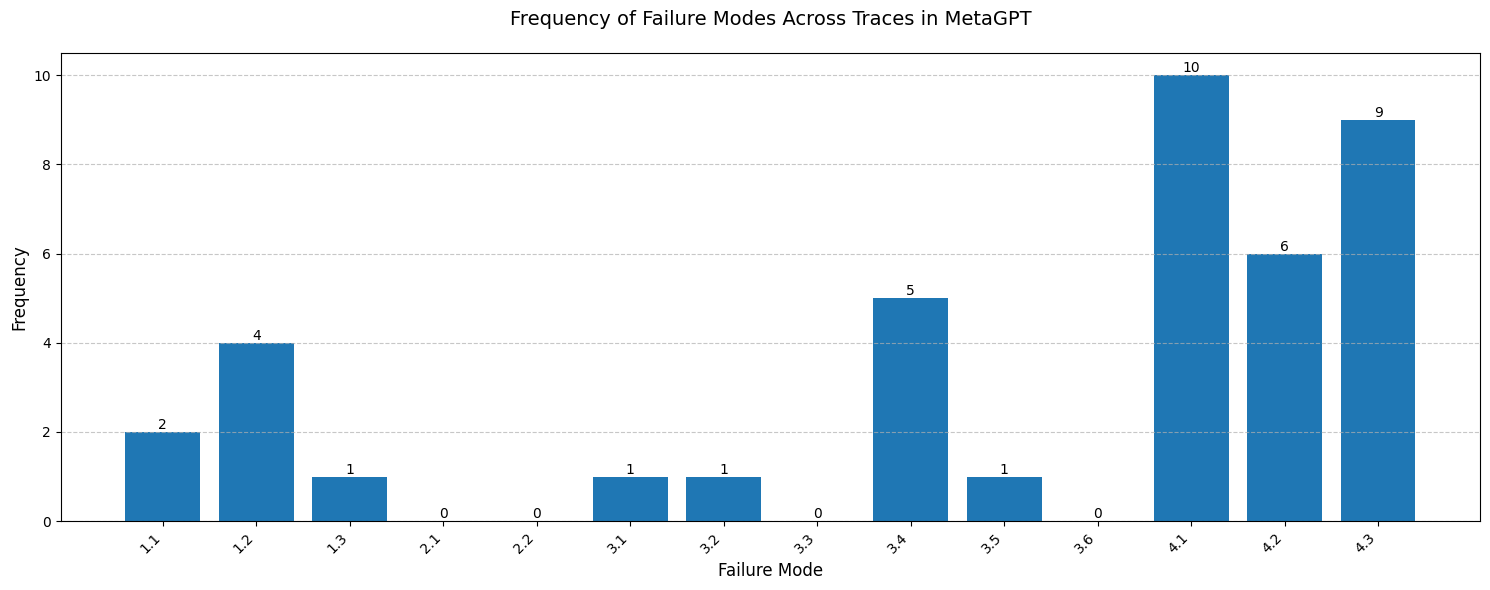

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with larger size
plt.figure(figsize=(15, 6))

# Create bar plot
bars = plt.bar(total_failure_modes.keys(), total_failure_modes.values())

# Customize the plot
plt.title('Frequency of Failure Modes Across Traces in MetaGPT', pad=20, size=14)
plt.xlabel('Failure Mode', size=12)
plt.ylabel('Frequency', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
print(evals[2])

*** begin of things you should answer ***

1. Freeform text summary of the problems with the inefficiencies or failure modes in the trace: The trace shows an initial misidentification of the problem (attempting a tictactoe and 2048 game setup), missing coverage of movement restrictions for non-pawn pieces in initial tests, and lack of verification for complete chess rules.
   
2. Whether the task is successfully completed or not: yes

3. Whether you encounter any of the failure modes or inefficiencies:
   3.1 Fail to detect ambiguity: yes
   3.2 Proceed with incorrect assumptions: yes
   3.3 Fail to elicit clarification: yes
   3.4 Tendency to over-achieve: no
   3.5 Underperform by waiting on instructions: no
   3.6 Withhold information: no
   3.7 Derailing from task objectives: no
   3.8 Waiting on agents to discover known information: no
   3.9 Redundant conversation for iterative tasks: no
   3.10 Unaware of stopping conditions: no
   3.11 Difficult in agreeing with agents: no
   3

In [10]:
def openai_evaluator_df(output):
        prompt = (
            "I will provide you the output of an analysis of a multiagent system (meta-gpt) that is run on a task. \n"
            "Process me the output such that there it is exactly in the format I provide below. \n"
            "I do not want any space between the lines. \n"
            "I do not want any other characters or text. I have not specified. Strictly obey the format. \n"
            "Here is the format: \n"
            "*** begin of format *** \n"
            "1. <summary> \n"
            "2. <yes or no> \n"
            "3.1 <yes or no> \n"
            "3.2 <yes or no> \n"
            "3.3 <yes or no> \n"
            "3.4 <yes or no> \n"
            "3.5 <yes or no> \n"
            "3.6 <yes or no> \n"
            "3.7 <yes or no> \n"
            "3.8 <yes or no> \n"
            "3.9 <yes or no> \n"
            "3.10 <yes or no> \n"
            "3.11 <yes or no> \n"
            "3.12 <yes or no> \n"
            "3.13 <yes or no> \n"
            "3.14 <yes or no> \n"
            "3.15 <yes or no> \n"
            "3.16 <yes or no> \n"
            "3.17 <yes or no> \n"
            "3.18 <yes or no> \n"
            "3.19 <yes or no> \n"
            "3.20 <yes or no> \n"
            "3.21 <yes or no> \n"
            "3.22 <yes or no> \n"
            "*** end of format *** \n"
            "Here is the output: \n"
            f"{output}"
        )
        return chat_completion_request_openai(prompt)

clean_evals = []
for count in range(31):
    clean_evals.append(openai_evaluator_df(evals[count]))


In [20]:
def process_evals(clean_evals):
    # Define column names based on the evaluation format
    columns = [
        'summary', 'task_completed',
        'fail_detect_ambiguity', 'incorrect_assumptions', 'fail_elicit_clarification',
        'over_achieve', 'underperform_waiting', 'withhold_information',
        'derail_objectives', 'waiting_known_info', 'redundant_conversation',
        'unaware_stopping', 'difficult_agreement', 'no_verify_outcome',
        'uncritical_eval', 'poor_task_adherence', 'thought_message_misalign',
        'false_completion', 'ignore_suggestions', 'discontinued_reasoning',
        'trajectory_restart', 'step_repetition', 'invented_content', 'blurring_roles'
    ]
    
    # Initialize empty DataFrame with index 0-30
    df = pd.DataFrame(index=range(31), columns=columns)
    
    # Process each evaluation
    for i in range(31):
        eval_text = clean_evals[i]
        lines = eval_text.split('\n')
        lines = lines[1:]
        lines = lines[:-1]
        # print(lines)
        # assert False
        # Extract summary (line 1)
        df.at[i, 'summary'] = lines[0].replace('1. ', '').strip()
        
        # Process yes/no answers
        for j, line in enumerate(lines[1:23]):  # Lines 2 and 3.1-3.22
            if j == 0:  # Line 2 (task completion)
                answer = line.replace('2. ', '').strip().lower()
                df.at[i, 'task_completed'] = True if answer == 'yes' else False
            else:  # Lines 3.1-3.22
                col = columns[j+1]  # Skip summary column
                answer = line.replace(f'3.{j} ', '').strip().lower()
                df.at[i, col] = True if answer == 'yes' else False
    
    # Convert boolean columns to boolean type
    for col in columns[1:]:  # Skip summary column
        df[col] = df[col].astype('boolean')
        
    return df

evals_df = process_evals(clean_evals)



In [22]:
evals_df.to_csv("evals_df.csv")

In [18]:
evals_df.iloc[2]

summary                      *** begin of format ***
task_completed                                 False
fail_detect_ambiguity                          False
incorrect_assumptions                          False
fail_elicit_clarification                      False
over_achieve                                   False
underperform_waiting                           False
withhold_information                           False
derail_objectives                              False
waiting_known_info                             False
redundant_conversation                         False
unaware_stopping                               False
difficult_agreement                            False
no_verify_outcome                              False
uncritical_eval                                False
poor_task_adherence                            False
thought_message_misalign                       False
false_completion                               False
ignore_suggestions                            

In [14]:
clean_evals[0]

'*** begin of format ***\n1. The task was completed but required multiple attempts due to missing dependencies,making the process inefficient.\n2. yes\n3.1 no\n3.2 no\n3.3 no\n3.4 no\n3.5 no\n3.6 no\n3.7 no\n3.8 no\n3.9 no\n3.10 no\n3.11 no\n3.12 no\n3.13 no\n3.14 no\n3.15 no\n3.16 no\n3.17 no\n3.18 no\n3.19 yes\n3.20 no\n3.21 no\n3.22 no\n*** end of format ***'

In [6]:
import pandas as pd

def process_evals_to_df(evals):
    # Define all column names based on the evaluation format
    columns = [
        'summary', 'task_completed', 
        'fail_detect_ambiguity', 'incorrect_assumptions', 'fail_elicit_clarification',
        'over_achieve', 'underperform_waiting', 'withhold_information',
        'derail_objectives', 'waiting_known_info', 'redundant_conversation',
        'unaware_stopping', 'difficult_agreement', 'no_verify_outcome',
        'uncritical_eval', 'poor_task_adherence', 'thought_message_misalign',
        'false_completion', 'ignore_suggestions', 'discontinued_reasoning',
        'trajectory_restart', 'step_repetition', 'invented_content', 'blurring_roles'
    ]
    
    # Initialize empty DataFrame with index 1-31
    df = pd.DataFrame(index=range(1, 32), columns=columns)
    
    # Process each evaluation
    for i in range(1, 32):
        if i in evals:
            eval_data = evals[i]
            content = eval_data.get('content', '')
            
            # Extract summary
            summary_start = content.find("<summary>") + len("<summary>")
            summary_end = content.find("</summary>") if "</summary>" in content else -1
            df.at[i, 'summary'] = content[summary_start:summary_end].strip() if summary_end != -1 else None
            
            # Extract yes/no answers
            df.at[i, 'task_completed'] = 'yes' in content.split("2. Whether the task is successfully completed or not:")[1].split("\n")[0].lower()
            
            # Process all yes/no failure modes
            for line in content.split("\n"):
                for col in columns[2:]:  # Skip summary and task_completed
                    if col in line.lower().replace(" ", "_"):
                        df.at[i, col] = 'yes' in line.lower()
    
    # Convert boolean columns to boolean type
    for col in columns[1:]:  # Skip summary column
        df[col] = df[col].astype('boolean')
    
    return df

# Create the DataFrame
eval_df = process_evals_to_df(evals)
display(eval_df)



,summary,task_completed,fail_detect_ambiguity,incorrect_assumptions,fail_elicit_clarification,over_achieve,underperform_waiting,withhold_information,derail_objectives,waiting_known_info,...,uncritical_eval,poor_task_adherence,thought_message_misalign,false_completion,ignore_suggestions,discontinued_reasoning,trajectory_restart,step_repetition,invented_content,blurring_roles
1,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [25]:
print(evals[2])

Inefficincy: Unnecessary API calls due to incorrect prompt clarification.
Specific Example: The prompt initially requested a chess game but examples show attempts with Tic Tac Toe and 2048, indicating confusion and resulting in multiple API calls to generate the correct game.

Inefficincy: Redundant calculations by multiple agents duplicating effort.
Specific Example: Alice and Bob both engaging in writing and testing code for chess moves that were already part of existing libraries, unnecessarily increasing computation time and costs.

Inefficincy: Resource-intensive operations for error checks that could be avoided.
Specific Example: Charlie reviews basic pawn movement multiple times instead of focusing on untested features like castling and checkmate validation, using additional resources.

Inefficincy: Delayed logic implementation causing repetitive revisions.
Specific Example: Initial implementation misses essential chess logic, such as check, castling, and en passant, which requi

In [20]:
print(chat_completion_request_openai(f"Tell me the difference between the tester and the reviewer in the following trace: {a1}"))

The roles of the tester and the reviewer in the trace you provided can be described as follows:

1. **Tester**:
   - In this trace, the tester is represented by Bob, who assumes the role of `SimpleTester`.
   - Bob's task is to create test cases for the 2048 game functionality, as shown in the script. He writes test cases for functions such as `compress`, `merge`, `reverse`, `transpose`, `move_left`, `move_right`, `move_up`, `move_down`, `add_two`, and checks the game state using `game_state`.
   - The aim of these tests is to verify that the game mechanics work as expected by covering various scenarios, like different moves and game conditions, checking tile operations, and ensuring the correct game state transitions.

2. **Reviewer**:
   - The reviewer in this trace is Charlie, who takes on the role of `SimpleReviewer`.
   - Charlie's task is to assess the quality and coverage of the tests written by Bob. They provide feedback and suggestions on the test cases.
   - Charlie's review 